In [1]:
import sys
import os
import warnings
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import drpy
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import shapely.geometry as sgeom
from matplotlib.gridspec import GridSpec
from datetime import datetime
from re import split
from matplotlib.animation import ArtistAnimation
warnings.filterwarnings('ignore')
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, progress
from metpy.plots import ctables


sys.path.insert(1, f"{os.path.abspath(os.path.join(os.path.abspath(''), '../'))}")
from src.utils import time_3d, get_pars_from_ini
location = split(', |_|-|!', os.popen('hostname').read())[0].replace("\n", "")
path_data = get_pars_from_ini(campaign='loc')[location]['path_data']
path_proj = get_pars_from_ini(campaign='loc')[location]['path_proj']
plt.rcParams['animation.html'] = 'jshtml'
%matplotlib inline

In [2]:
cluster = SLURMCluster(queue="seseml",
                       memory='200GB',
                       cores=40,
                       processes=1,
                       walltime='48:00:00',
                       scheduler_options={'host': '172.22.179.3:7223', 'dashboard_address': ':7999'})

In [3]:
# cluster.scale(2)
cluster.adapt(maximum_jobs=4)
cluster

In [4]:
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://172.22.179.3:7999/status,
Dashboard: http://172.22.179.3:7999/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.22.179.3:7223,Workers: 0
Dashboard: http://172.22.179.3:7999/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [5]:
time_sel = slice('2019-09-22 02:20', '2019-09-22 03:05')

In [6]:
ds_lores = xr.open_zarr(f'{path_data}/zarr_rckd/KUsKAs_Wn/lores.zarr')
ds_lores = ds_lores.sel(time=~ds_lores.get_index("time").duplicated())

In [7]:
dsl_rf12 = ds_lores.sel(time=time_sel)

In [8]:
ds_hires =xr.open_zarr(f'{path_data}/zarr_rckd/KUsKAs_Wn/hires.zarr')
ds_hires = ds_hires.sel(time=~ds_hires.get_index("time").duplicated())

In [9]:
ds_hires = ds_hires.sortby("time")
dsh_rf12 = ds_hires.sel(time=time_sel)

(0.0, 4000.0)

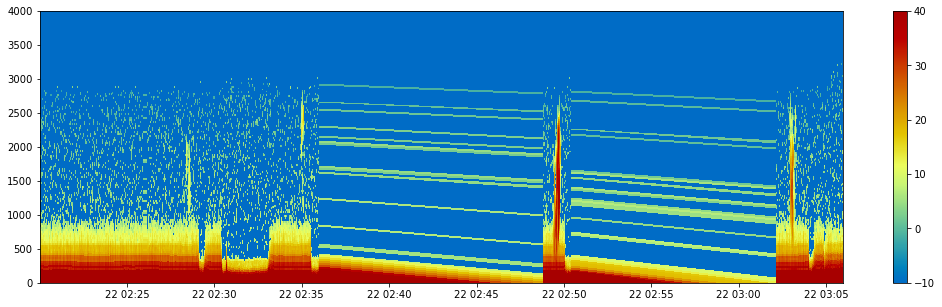

In [10]:
# Ku
fig = plt.figure(figsize=(18, 5))
ax3 = fig.add_subplot()
time_3D = time_3d(dsl_rf12.scantime, dsl_rf12.alt3D.shape[0])
im3 = ax3.pcolormesh(time_3D[:, 12, :],
                       dsl_rf12.alt3D[:, 12, :],
#                        np.where(dsl_rf12.zhh35[:, 12, :]< 0, np.nan, dsl_rf12.zhh14[:, 12, :]),
                       dsl_rf12.zhh14[:, 12, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-10, vmax=40)
plt.colorbar(im3)
ax3.set_ylim(0, 4000)

(0.0, 4000.0)

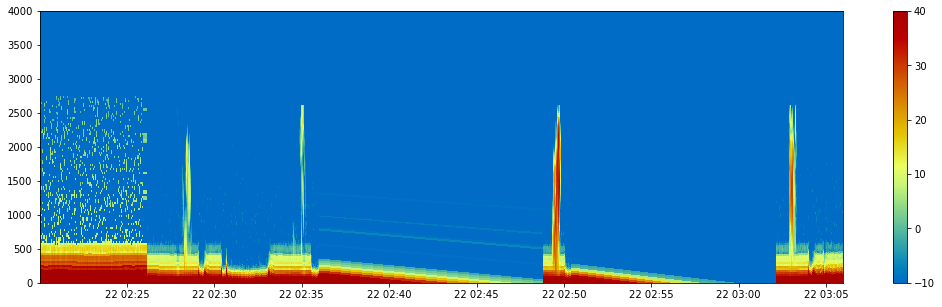

In [11]:
## Plotting Ka
fig = plt.figure(figsize=(18, 5))
ax3 = fig.add_subplot()
time_3D = time_3d(dsl_rf12.scantime, dsl_rf12.alt3D.shape[0])
im3 = ax3.pcolormesh(time_3D[:, 12, :],
                       dsl_rf12.alt3D[:, 12, :],
#                        np.where(dsl_rf12.zhh14[:, 12, :]< 0, np.nan, dsl_rf12.zhh14[:, 12, :]),
                       dsl_rf12.zhh35[:, 12, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-10, vmax=40)
plt.colorbar(im3)
ax3.set_ylim(0, 4000)

(0.0, 4000.0)

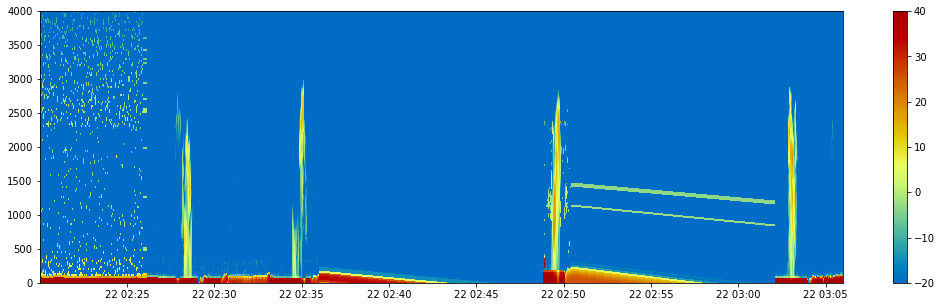

In [12]:
## Plotting W
fig = plt.figure(figsize=(18, 5))
ax3 = fig.add_subplot()
time_3D = time_3d(dsh_rf12.scantime, dsh_rf12.alt3D.shape[0])
im3 = ax3.pcolormesh(time_3D[:, 0, :],
                       dsh_rf12.alt3D[:, 0, :],
#                        np.where(dsh_rf12.z95n[:, 0, :]<0, np.nan, dsh_rf12.z95n[:, 0, :]),
                     dsh_rf12.z95n[:, 0, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-20, vmax=40)
plt.colorbar(im3)
ax3.set_ylim(0, 4000)

In [13]:
diff = 10 ** (dsl_rf12.zhh14 / 10) -  10 ** (dsl_rf12.zhh35 / 10)

(0.0, 4000.0)

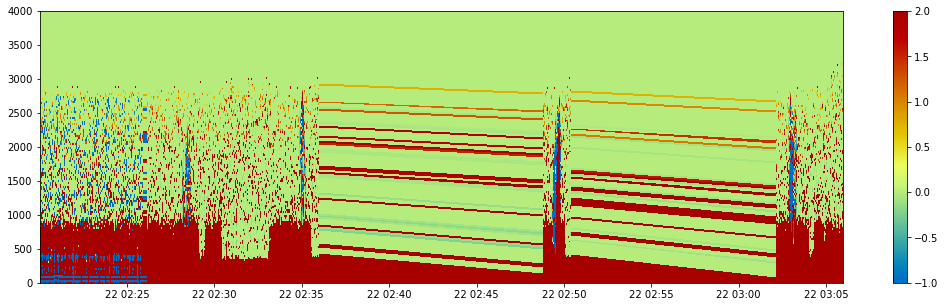

In [15]:
## Plotting Ka
fig = plt.figure(figsize=(18, 5))
ax3 = fig.add_subplot()
time_3D = time_3d(dsl_rf12.scantime, dsl_rf12.alt3D.shape[0])
im3 = ax3.pcolormesh(time_3D[:, 12, :],
                       dsl_rf12.alt3D[:, 12, :],
#                        np.where(dsl_rf12.zhh14[:, 12, :]< 0, np.nan, dsl_rf12.zhh14[:, 12, :]),
                       diff[:, 12, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-1, vmax=2)
plt.colorbar(im3)
ax3.set_ylim(0, 4000)